In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib notebook

# Read US State Codes data
state_code = pd.read_csv('us_state_code_data.csv')

# Read raw data
df = pd.read_excel('RCMSMGCY.xlsx')
df.head()


,FIPSMERG,CNTYNM,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
0,1001,Autauga County,AL,1980,32259,005,African Methodist Episcopal Zion Church,1914.0,7.0,6,92.0,0,0,1
1,1001,Autauga County,AL,1980,32259,017,American Baptist Association,95.0,1.0,1,96.0,4,0,0
2,1001,Autauga County,AL,1980,32259,053,Assemblies of God,110.0,1.0,1,94.0,0,0,0
3,1001,Autauga County,AL,1980,32259,081,Catholic Church,43.0,1.0,3,87.0,0,0,2
4,1001,Autauga County,AL,1980,32259,089,The Christian and Missionary Alliance,204.0,1.0,1,93.0,0,0,0


In [2]:
adh = df.groupby(by=['YEAR','CNTYNM', 'STATEAB']).agg({'ADHERENT':sum}).reset_index()
pop = (df[['YEAR','CNTYNM', 'STATEAB','TOTPOP']].drop_duplicates()).groupby(by=['YEAR','CNTYNM', 'STATEAB']).agg({'TOTPOP':sum}).reset_index()

data = pd.merge(adh, pop, how='inner')
data.loc[:,'PER_ADHERENTS'] = data.loc[:,'ADHERENT']/data.loc[:,'TOTPOP']

#State Level data
state_data = data.groupby(by=['YEAR','STATEAB']).agg({'ADHERENT':sum, 'TOTPOP':sum}).reset_index()
state_data.loc[:,'PER_ADHERENTS'] = state_data.loc[:,'ADHERENT']/state_data.loc[:,'TOTPOP']
state_data.head()

,YEAR,STATEAB,ADHERENT,TOTPOP,PER_ADHERENTS
0,1980,AK,144498.0,401850,0.359582
1,1980,AL,2310686.0,3893888,0.593414
2,1980,AR,1339534.0,2378488,0.563187
3,1980,AZ,1140677.0,2705658,0.421589
4,1980,CA,8598856.0,23667902,0.363313


In [3]:
comp_data = state_data[['YEAR','STATEAB','PER_ADHERENTS']]
comp_data = (comp_data.pivot(index='STATEAB', columns='YEAR')['PER_ADHERENTS']).reset_index().rename_axis(None, axis=1)
comp_data.loc[:,'CHANGE'] = (comp_data.loc[:,2010]-comp_data.loc[:,1980])/comp_data.loc[:,1980]

comp_data = pd.merge(comp_data, state_code, how='inner', left_on='STATEAB', right_on='Postal Code')
comp_data = comp_data[['STATEAB',1980,1990,2000,2010,'CHANGE','State Name']]
comp_data.head()

,STATEAB,1980,1990,2000,2010,CHANGE,State Name
0,AK,0.359582,0.370793,0.422148,0.396029,0.101359,Alaska
1,AL,0.593414,0.721950,0.631723,0.704579,0.187332,Alabama
2,AR,0.563187,0.657898,0.642946,0.651709,0.157179,Arkansas
3,AZ,0.421589,0.452728,0.432987,0.396227,-0.060159,Arizona
4,CA,0.363313,0.433622,0.481126,0.465983,0.282593,California


In [4]:
final_data = (comp_data[['State Name','CHANGE']]).sort_values(by='CHANGE').reset_index(drop=True)
final_data.head()

,State Name,CHANGE
0,Maine,-0.281532
1,Rhode Island,-0.279296
2,Vermont,-0.264020
3,New Hampshire,-0.189414
4,Connecticut,-0.174371


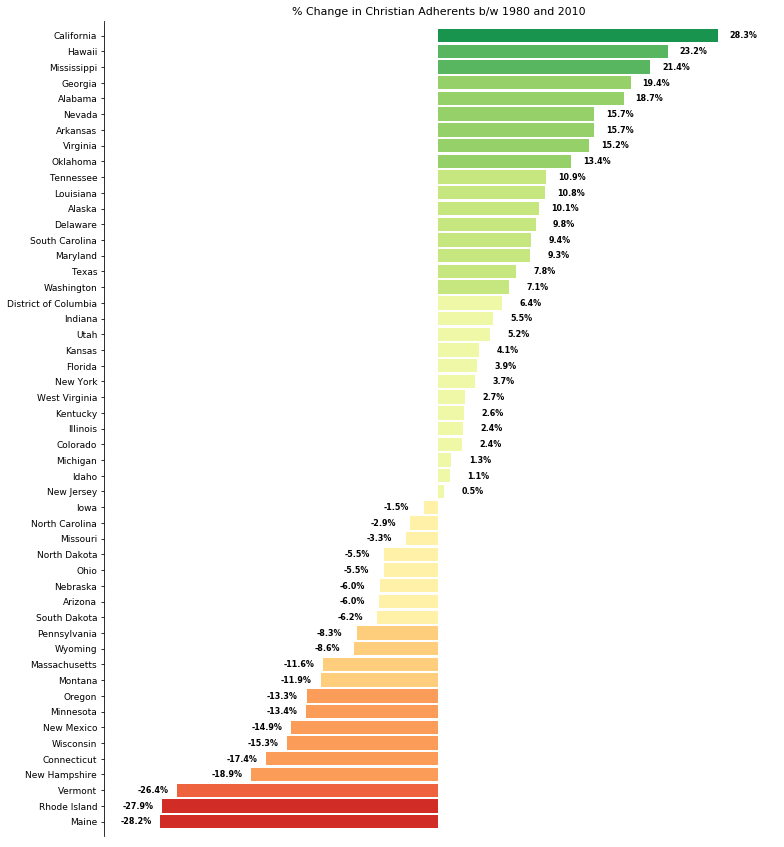

In [16]:
def normalize_values(lista):
    l1 = []
    for i in range(len(lista)):
        f = (lista[i]+0.4)/0.8 
        l1.append(f)
    return l1

def normalize_weight(w): return (w+0.4)/0.8 

plt.figure(figsize=(12,15)) 

plt.title(label="% Change in Christian Adherents b/w 1980 and 2010", fontsize=11)
colormap = cm.get_cmap('RdYlGn', 12)

plt.barh(final_data['State Name'].tolist(), final_data['CHANGE'].tolist(), height=0.85, align='center',
         color=colormap(normalize_values(final_data['CHANGE'].tolist())))
plt.tick_params(axis='x',which='both',top=False, bottom=False, labelbottom=False)
plt.yticks(fontsize=9)
ax = plt.gca()

ax.margins(y=0.01)
ax.margins(x=0.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_visible(False) 

rects = ax.get_children()[0:51]
def autolabel(rects):
    for rect in rects:
        if rect.get_width() < 0:
            height = rect.get_width()
            ax.text(height-0.04, rect.get_y()+ rect.get_height()/2., "{:.1%}".format(height), ha='left', va='center', 
                    fontsize=8, fontweight='bold')
        elif rect.get_width() > 0:
            height = rect.get_width()
            ax.text(height+0.04, rect.get_y() + rect.get_height()/2., "{:.1%}".format(height), ha='right', va='center', 
                    fontsize=8, fontweight='bold')    
autolabel(rects)


#plt.savefig("barh.pdf",padding=0)
